In [1]:
import pandas as pd
import numpy as np

In [2]:
X_train = pd.read_csv("D:/Hackathons/GST_GOV/Train_60/X_Train_Data_Input_Imputed.csv")
y_train = pd.read_csv('D:/Hackathons/GST_GOV/Train_60/Y_Train_Data_Target.csv')
X_test = pd.read_csv('D:/Hackathons/GST_GOV/Test_20/X_Test_Data_Input_Imputed.csv')
y_test = pd.read_csv('D:/Hackathons/GST_GOV/Test_20/Y_Test_Data_Target.csv')

In [3]:
df_train=pd.concat([X_train,y_train],axis=1)
df_test=pd.concat([X_test,y_test],axis=1)

In [4]:
y_train = y_train.drop('ID', axis=1)
y_test = y_test.drop('ID', axis=1)

### Understanding data

In [4]:
X_train.nunique()

Column0         19
Column1         47
Column2         47
Column3     148334
Column4     157264
Column5     355728
Column6      66302
Column7      42362
Column8       2564
Column10      9424
Column11    166513
Column12         2
Column13         2
Column14         2
Column15         2
Column16         3
Column17       153
Column18        11
Column19         2
Column20         2
Column21         2
dtype: int64

In [5]:
y_train.value_counts()/len(y_train) * 100

target
0         90.570642
1          9.429358
Name: count, dtype: float64

In [8]:
y_test.value_counts()/len(y_test)

target
0         0.905706
1         0.094294
Name: count, dtype: float64

### Understanding Column 0

In [29]:
X_train['Column0'].value_counts()

Column0
0.0     629567
2.0      73595
1.0      56021
4.0       6296
5.0       6277
6.0       5998
7.0       4156
3.0       1605
9.0        540
8.0        386
11.0       328
12.0       161
15.0        78
14.0        66
13.0        22
10.0        17
16.0        10
18.0         6
17.0         4
Name: count, dtype: int64

In [30]:
pd.crosstab(X_train['Column0'], y_train['target'], margins=True)

target        0      1     All
Column0                       
0.0      563441  66126  629567
1.0       52766   3255   56021
2.0       69820   3775   73595
3.0        1526     79    1605
4.0        6106    190    6296
5.0        6028    249    6277
6.0        5779    219    5998
7.0        4040    116    4156
8.0         384      2     386
9.0         533      7     540
10.0         13      4      17
11.0        322      6     328
12.0        160      1     161
13.0         21      1      22
14.0         65      1      66
15.0         76      2      78
16.0         10      0      10
17.0          4      0       4
18.0          6      0       6
All      711100  74033  785133

### Polynomial transformation

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = Poly.fit_transform(X_train)
X_poly_test = Poly.fit_transform(X_test)
print(X_poly_train.shape)
print(X_poly_test.shape)

<Axes: >

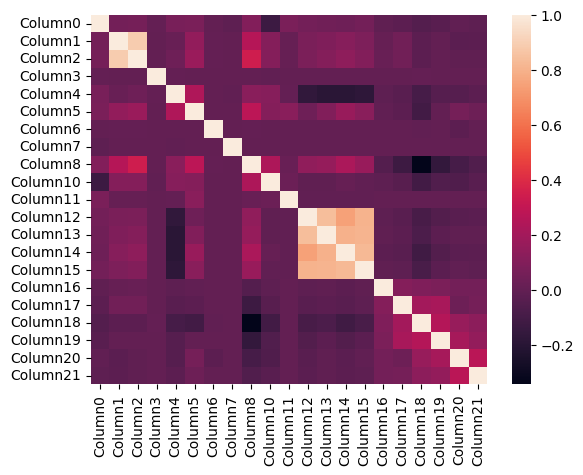

In [10]:
import seaborn as sns
sns.heatmap(X_train.corr())

In [12]:
X_poly_train = pd.DataFrame(X_poly_train)
X_poly_test = pd.DataFrame(X_poly_test)

In [13]:
sns.heatmap(X_poly_train.corr())

### Training model on raw polynomially transformed column

In [5]:
from xgboost import XGBClassifier
# Model Training (RandomForest as an example)
clf = XGBClassifier(n_estimators=630, max_depth=15, learning_rate=0.028915603309854175, colsample_bytree=0.6992771117133701, subsample=0.7776780164802461, gamma=2.0627935416787126, reg_alpha=0.16195344119939925, reg_lambda=6.203793807393017)
clf.fit(X_poly_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6992771117133701, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=2.0627935416787126,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.028915603309854175,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=630, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [6]:
y_pred = clf.predict(X_poly_test)

              precision    recall  f1-score   support

           0  0.9935077953 0.9826143085 0.9880310264    237034
           1  0.8489203358 0.9383256342 0.8913867770     24678

    accuracy                      0.9784381305    261712
   macro avg  0.9212140656 0.9604699713 0.9397089017    261712
weighted avg  0.9798739943 0.9784381305 0.9789180061    261712



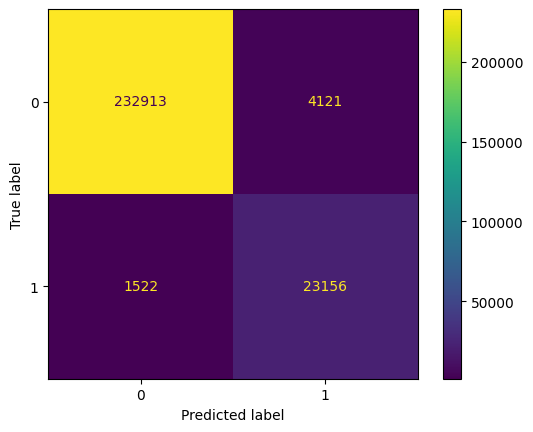

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
print(classification_report(y_test, y_pred, digits=10))
print(ConfusionMatrixDisplay.from_estimator(clf, X_poly_test, y_test))

d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 74033, number of negative: 711100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.406613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36951
[LightGBM] [Info] Number of data points in the train set: 785133, number of used features: 252
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094294 -> initscore=-2.262302
[LightGBM] [Info] Start training from score -2.262302
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

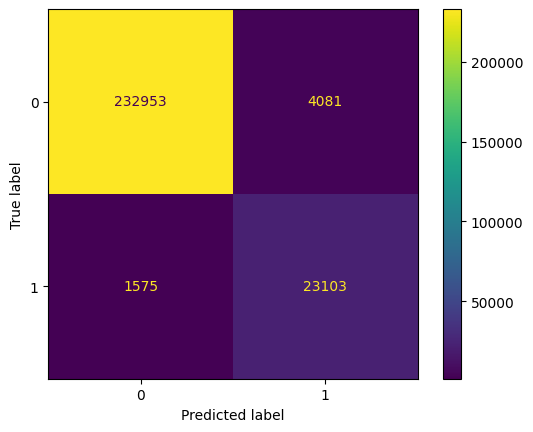

In [8]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators=1300, num_leaves = 101, learning_rate=0.03039023059155093, colsample_bytree=0.5612757446879437, subsample=0.6134737435894826, min_child_samples=26, reg_alpha=8.99765894966435, reg_lambda=5.397093746172259, max_depth=21)
lgb.fit(X_poly_train, y_train)
y_pred_lgb=lgb.predict(X_poly_test)
print(classification_report(y_test, y_pred_lgb, digits=10))
print(ConfusionMatrixDisplay.from_estimator(lgb, X_poly_test, y_test))

d:\Python\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0  0.9909939818 0.9822978982 0.9866267786    237034
           1  0.8431870842 0.9142556123 0.8772843923     24678

    accuracy                      0.9758818854    261712
   macro avg  0.9170905330 0.9482767552 0.9319555855    261712
weighted avg  0.9770566055 0.9758818854 0.9763163939    261712



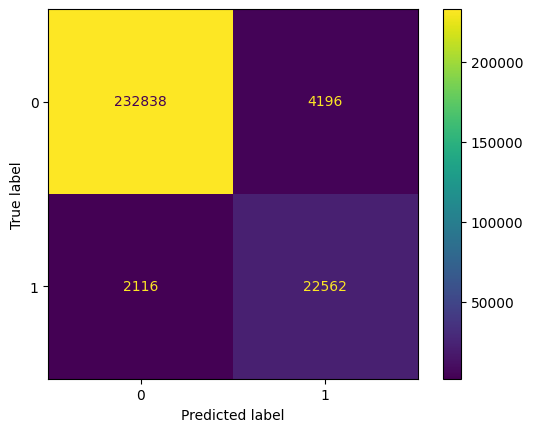

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_poly_train, y_train)
y_pred_rf=rf.predict(X_poly_test)
print(classification_report(y_test, y_pred_rf, digits=10))
print(ConfusionMatrixDisplay.from_estimator(rf, X_poly_test, y_test))

### Checking duplicate columns

In [5]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column
    return duplicate_columns

In [6]:
duplicate_columns = get_duplicate_columns(X_train)
print(duplicate_columns)

{}


In [5]:
numerical_columns = [col for col in X_train.columns if X_train[col].nunique() > 153]
categorical_columns = [col for col in X_train.columns if ((X_train[col].nunique() > 2) & (X_train[col].nunique() <= 153))]
binary_columns = [col for col in X_train.columns if X_train[col].nunique() == 2]
print(numerical_columns)
print(categorical_columns)
print(binary_columns)

['Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column10', 'Column11']
['Column0', 'Column1', 'Column2', 'Column16', 'Column17', 'Column18']
['Column12', 'Column13', 'Column14', 'Column15', 'Column19', 'Column20', 'Column21']


### Understanding binary columns

In [8]:
import seaborn as sns

In [9]:
for i in binary_columns:
    print(X_train[i].value_counts())

Column12
0.0    596250
1.0    188883
Name: count, dtype: int64
Column13
0.0    541394
1.0    243739
Name: count, dtype: int64
Column14
0.0    500034
1.0    285099
Name: count, dtype: int64
Column15
0.0    527386
1.0    257747
Name: count, dtype: int64
Column19
0.0    770405
1.0     14728
Name: count, dtype: int64
Column20
0.0    777791
1.0      7342
Name: count, dtype: int64
Column21
0.0    782968
1.0      2165
Name: count, dtype: int64


In [11]:
pd.crosstab(X_train['Column19'], y_train['target'], margins=True)

target         0      1     All
Column19                       
0.0       705811  64594  770405
1.0         5289   9439   14728
All       711100  74033  785133

In [12]:
pd.crosstab(X_train['Column20'], y_train['target'], margins=True)

target         0      1     All
Column20                       
0.0       707443  70348  777791
1.0         3657   3685    7342
All       711100  74033  785133

In [13]:
pd.crosstab(X_train['Column21'], y_train['target'], margins=True)

target         0      1     All
Column21                       
0.0       710573  72395  782968
1.0          527   1638    2165
All       711100  74033  785133

Although the variance in Column19, Column20, Column21 seems to be low, the distribution of the minority class is significant.

In [14]:
from sklearn.feature_selection import VarianceThreshold
VarianceThresholdSelector = VarianceThreshold(threshold=0.05)
VarianceThresholdSelector.fit(X_train)

VarianceThreshold(threshold=0.05)

In [15]:
sum(VarianceThresholdSelector.get_support())

17

In [21]:
VarianceThresholdSelector.get_feature_names_out()

array(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column17',
       'Column18'], dtype=object)

In [22]:
less_var_col = [col for col in X_train.columns if col not in X_train.columns[VarianceThresholdSelector.get_support()]]
print(less_var_col)

['Column16', 'Column19', 'Column20', 'Column21']


### Understanding Numerical columns

In [23]:
numerical_columns

['Column3',
 'Column4',
 'Column5',
 'Column6',
 'Column7',
 'Column8',
 'Column10',
 'Column11']

In [6]:
import matplotlib.pyplot as plt

In [7]:
X_train[numerical_columns].hist(bins=50, figsize=(20,15))

array([[<Axes: title={'center': 'Column3'}>,
        <Axes: title={'center': 'Column4'}>,
        <Axes: title={'center': 'Column5'}>],
       [<Axes: title={'center': 'Column6'}>,
        <Axes: title={'center': 'Column7'}>,
        <Axes: title={'center': 'Column8'}>],
       [<Axes: title={'center': 'Column10'}>,
        <Axes: title={'center': 'Column11'}>, <Axes: >]], dtype=object)

In [22]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [25]:
pd.reset_option('display.float_format')

In [23]:
X_train[numerical_columns].describe()

Column3           Column4           Column5           Column6  \
count 785133.0000000000 785133.0000000000 785133.0000000000 785133.0000000000   
mean      -0.0018795052     -0.0027061022     -0.0039576075     -0.0007481468   
std        0.9007070824      0.9969371475      1.0555636943      1.2698722211   
min       -0.0074686503     -0.4079391218     -0.7749791570  -1091.5459037897   
25%       -0.0074686503     -0.4079391218     -0.7749791570      0.0033900986   
50%       -0.0074686503     -0.4079391218      0.1111074331      0.0033900986   
75%       -0.0074679142     -0.3696507345      0.6226010103      0.0033900986   
max      551.4211272824     14.9858167641    323.9924837297      0.0127356536   

                Column7           Column8          Column10          Column11  
count 785133.0000000000 785133.0000000000 785133.0000000000 785133.0000000000  
mean       0.0001682735   1321.7886141584   2951.2794112590      0.0007269833  
std        0.9437403612    907.2679649274   2143.1401400897      1.0458826825  
min     -832.7496150481  -1080.0000000000    -47.0000000000     -0.0156074272  
25%        0.0013506056    515.0000000000   1129.0000000000     -0.0156074272  
50%        0.0013506401   1173.0000000000   2709.0000000000     -0.0156074272  
75%        0.0013506401   2435.0000000000   4472.0000000000     -0.0156071739  
max        8.5144156509   2499.0000000000  10290.0000000000    201.6879465072

In [24]:
X_train['Column3'].value_counts().apply("{:.10f}".format)

Column3
-0.0074686503    515131.0000000000
-0.0074679148     68775.0000000000
-0.0074679148       629.0000000000
-0.0074678528       385.0000000000
-0.0074679148       197.0000000000
                       ...        
-0.0074678997         1.0000000000
3.5782977476          1.0000000000
-0.0074671728         1.0000000000
-0.0074671895         1.0000000000
-0.0074673720         1.0000000000
Name: count, Length: 148334, dtype: object

In [30]:
X_train[categorical_columns].hist(bins=50, figsize=(20,15))

array([[<Axes: title={'center': 'Column0'}>,
        <Axes: title={'center': 'Column1'}>],
       [<Axes: title={'center': 'Column2'}>,
        <Axes: title={'center': 'Column16'}>],
       [<Axes: title={'center': 'Column17'}>,
        <Axes: title={'center': 'Column18'}>]], dtype=object)

In [31]:
X_train[categorical_columns].describe()

Column0        Column1        Column2       Column16  \
count  785133.000000  785133.000000  785133.000000  785133.000000   
mean        0.440752       0.108915       0.113375       0.001206   
std         1.163269       0.949283       0.951365       0.034855   
min         0.000000      -2.028572      -1.855728       0.000000   
25%         0.000000       0.001462      -0.321449       0.000000   
50%         0.000000       0.678139       0.701403       0.000000   
75%         0.000000       0.678139       0.701403       0.000000   
max        18.000000       0.678139       0.701403       2.000000   

            Column17       Column18  
count  785133.000000  785133.000000  
mean        0.270092       0.147856  
std         3.128214       0.430530  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max       728.000000      12.000000

### Preprocessing numerical columns and fitting baseline model

In [20]:
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.compose import ColumnTransformer

In [21]:
pt=PowerTransformer(method='yeo-johnson')
scaler = RobustScaler()

In [22]:
skewed_columns = ['Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column10', 'Column11']
scaled_columns = ['Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column10', 'Column11']

In [23]:
preprocessing_pipeline = ColumnTransformer([
    ('pt', pt, skewed_columns),
    ('scaler', scaler, scaled_columns)
], remainder='passthrough')

In [24]:
X_train_scaled = preprocessing_pipeline.fit_transform(X_train)
X_test_scaled = preprocessing_pipeline.transform(X_test)

In [25]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [26]:
X_train_scaled.head()

0         1         2         3         4         5         6   \
0 -0.023699  1.926451  0.879280  0.077901 -0.000642  0.509624 -0.119805   
1 -0.022920  2.136482  0.608976  0.077901 -0.000642  0.408778 -0.034412   
2 -0.044868 -0.541002 -1.016515  0.077901 -0.000643  0.792966 -0.133566   
3 -0.044868 -0.541002 -1.016515  0.077901 -0.000641 -1.795359 -0.133566   
4 -0.044868 -0.541002 -1.016515  0.077901 -0.000641 -0.817435 -0.133566   

         7          8         9   ...   18   19   20   21   22   23   24   25  \
0  0.999191  21.994371  0.354296  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.036013  51.267163  0.156584  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.000000   0.000000 -0.634015  ...  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  0.000000   0.000000 -0.634015  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4  0.000000   0.000000 -0.634015  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    26   27  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 28 columns]

In [27]:
selector = SelectKBest(mutual_info_classif, k=10)
pca = PCA(n_components=10)

X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
X_train.head()

d:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Column0   Column1   Column2   Column3   Column4   Column5  Column6  \
0      2.0  0.678139  0.701403 -0.007468  0.434190  0.606265  0.00339   
1      0.0  0.452580  0.701403 -0.007468  1.554998  0.329946  0.00339   
2      2.0 -1.577453 -1.429540 -0.007469 -0.407939 -0.774979  0.00339   
3      0.0  0.678139  0.701403 -0.007469 -0.407939 -0.774979  0.00339   
4      0.0 -2.028572 -1.855728 -0.007469 -0.407939 -0.774979  0.00339   

    Column7  Column8  Column10  ...  Column12  Column13  Column14  Column15  \
0  0.001351   2495.0    3726.0  ...       0.0       0.0       0.0       0.0   
1  0.001351   2495.0    3454.0  ...       0.0       0.0       0.0       0.0   
2  0.001351   2495.0    4543.0  ...       1.0       1.0       1.0       1.0   
3  0.001351    211.0      59.0  ...       0.0       0.0       0.0       0.0   
4  0.001351    718.0     950.0  ...       0.0       0.0       0.0       0.0   

   Column16  Column17  Column18  Column19  Column20  Column21  
0       0.0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       1.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0       0.0  

[5 rows x 21 columns]

In [28]:
X_train_selected = pd.DataFrame(X_train_selected)
X_test_selected = pd.DataFrame(X_test_selected)

In [29]:
X_train_selected.head()

0         1         2         3       4    5    6    7    8    9
0  1.926451  0.879280  0.678139  0.701403  2495.0  0.0  0.0  0.0  0.0  0.0
1  2.136482  0.608976  0.452580  0.701403  2495.0  0.0  0.0  0.0  0.0  0.0
2 -0.541002 -1.016515 -1.577453 -1.429540  2495.0  1.0  1.0  1.0  0.0  0.0
3 -0.541002 -1.016515  0.678139  0.701403   211.0  0.0  0.0  0.0  0.0  1.0
4 -0.541002 -1.016515 -2.028572 -1.855728   718.0  0.0  0.0  0.0  0.0  0.0

In [36]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

d:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0  0.9929326054 0.9797666158 0.9863056750    237034
           1  0.8276122354 0.9330172623 0.8771595649     24678

    accuracy                      0.9753584092    261712
   macro avg  0.9102724204 0.9563919390 0.9317326200    261712
weighted avg  0.9773438051 0.9753584092 0.9760137980    261712

ROC AUC Score: 0.993552641767539


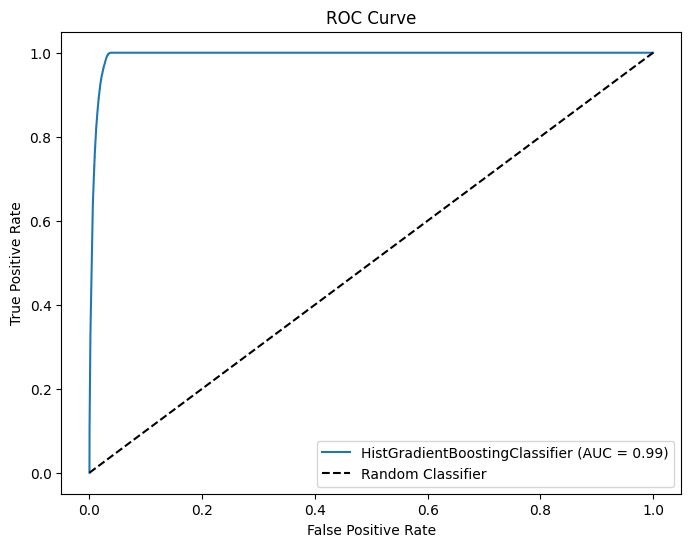

Optimal Threshold: 0.1553733751842241


In [34]:
hgb_classifier = HistGradientBoostingClassifier(random_state=42)
hgb_classifier.fit(X_train_selected, y_train)

# Step 8: Model Evaluation
# Predictions and evaluation
y_pred = hgb_classifier.predict(X_test_selected)
y_pred_proba = hgb_classifier.predict_proba(X_test_selected)[:, 1]

# Calculate classification report
print(classification_report(y_test, y_pred, digits=10))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'HistGradientBoostingClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Step 9: Determine Optimal Threshold
# Return the optimal threshold that maximizes the ROC curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold}')

d:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0  0.9941292338 0.9815764827 0.9878129809    237034
           1  0.8421813451 0.9443228787 0.8903321935     24678

    accuracy                      0.9780636730    261712
   macro avg  0.9181552894 0.9629496807 0.9390725872    261712
weighted avg  0.9798013848 0.9780636730 0.9786210797    261712

ROC AUC Score: 0.9945980092026111


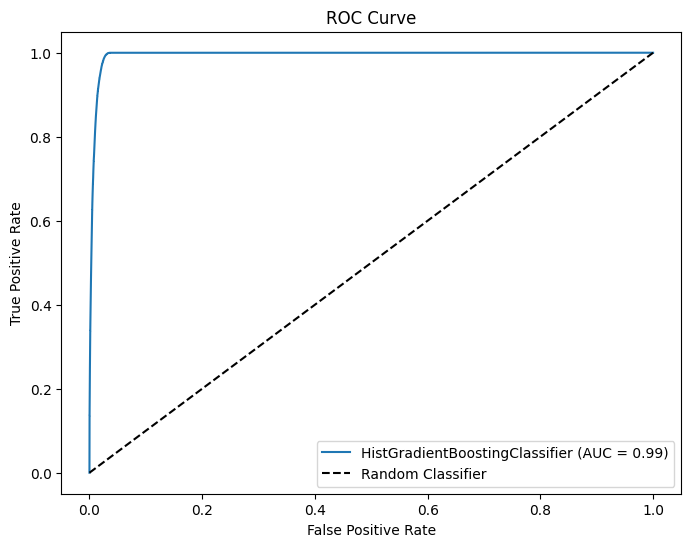

Optimal Threshold: 0.11292576496967902


In [35]:
hgb_classifier = HistGradientBoostingClassifier(random_state=42)
hgb_classifier.fit(X_train_scaled, y_train)

# Step 8: Model Evaluation
# Predictions and evaluation
y_pred = hgb_classifier.predict(X_test_scaled)
y_pred_proba = hgb_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate classification report
print(classification_report(y_test, y_pred, digits=10))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'HistGradientBoostingClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Step 9: Determine Optimal Threshold
# Return the optimal threshold that maximizes the ROC curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold}')

In [37]:
hgb_classifier = HistGradientBoostingClassifier(random_state=42)
hgb_classifier.fit(X_train_pca, y_train)

# Step 8: Model Evaluation
# Predictions and evaluation
y_pred = hgb_classifier.predict(X_test_pca)
y_pred_proba = hgb_classifier.predict_proba(X_test_pca)[:, 1]

# Calculate classification report
print(classification_report(y_test, y_pred, digits=10))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'HistGradientBoostingClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Step 9: Determine Optimal Threshold
# Return the optimal threshold that maximizes the ROC curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold}')

d:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0  0.9656391764 0.9896259608 0.9774854362    237034
           1  0.8691325173 0.6617635141 0.7514033312     24678

    accuracy                      0.9587103381    261712
   macro avg  0.9173858468 0.8256947374 0.8644443837    261712
weighted avg  0.9565391300 0.9587103381 0.9561671390    261712

ROC AUC Score: 0.9587224048356806


Optimal Threshold: 0.10572417031010911


In [38]:
from sklearn.preprocessing import PolynomialFeatures
Poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = Poly.fit_transform(X_train_scaled)
X_poly_test = Poly.fit_transform(X_test_scaled)
X_poly_train = pd.DataFrame(X_poly_train)
X_poly_test = pd.DataFrame(X_poly_test)
print(X_poly_train.shape)
print(X_poly_test.shape)

(785133, 434)
(261712, 434)


In [ ]:
selector = SelectKBest(mutual_info_classif, k=50)
X_train_selected = selector.fit_transform(X_poly_train, y_train)
X_test_selected = selector.transform(X_poly_test)
X_train_selected = pd.DataFrame(X_train_selected)
X_test_selected = pd.DataFrame(X_test_selected)

In [ ]:
hgb_classifier = HistGradientBoostingClassifier(random_state=42)
hgb_classifier.fit(X_train_selected, y_train)

# Step 8: Model Evaluation
# Predictions and evaluation
y_pred = hgb_classifier.predict(X_test_selected)
y_pred_proba = hgb_classifier.predict_proba(X_test_selected)[:, 1]

# Calculate classification report
print(classification_report(y_test, y_pred, digits=10))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'HistGradientBoostingClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Step 9: Determine Optimal Threshold
# Return the optimal threshold that maximizes the ROC curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold}')

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train_selected, y_train)
y_pred_lgb=lgb.predict(X_test_selected)
print(classification_report(y_test, y_pred_lgb, digits=10))
